In [25]:
from pykalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')

In [3]:
tau = 0.1

In [4]:
kf = KalmanFilter(
    initial_state_mean=[30, 10],
    initial_state_covariance=np.eye(2),
    transition_matrices=[[1, tau],[0, 1]],
    observation_matrices=[[1, 0]],
    transition_covariance=np.zeros((2, 2)),
    observation_covariance=3,
    transition_offsets=[-4.9 * tau **2, -9.8 * tau],
    random_state=5
)

In [5]:
times = np.arange(40)
times = times * tau
times

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9])

In [6]:
actual = -4.9 * times ** 2
actual

array([-0.0000e+00, -4.9000e-02, -1.9600e-01, -4.4100e-01, -7.8400e-01,
       -1.2250e+00, -1.7640e+00, -2.4010e+00, -3.1360e+00, -3.9690e+00,
       -4.9000e+00, -5.9290e+00, -7.0560e+00, -8.2810e+00, -9.6040e+00,
       -1.1025e+01, -1.2544e+01, -1.4161e+01, -1.5876e+01, -1.7689e+01,
       -1.9600e+01, -2.1609e+01, -2.3716e+01, -2.5921e+01, -2.8224e+01,
       -3.0625e+01, -3.3124e+01, -3.5721e+01, -3.8416e+01, -4.1209e+01,
       -4.4100e+01, -4.7089e+01, -5.0176e+01, -5.3361e+01, -5.6644e+01,
       -6.0025e+01, -6.3504e+01, -6.7081e+01, -7.0756e+01, -7.4529e+01])

In [7]:
sim = actual + 3 * np.random.randn(40)

In [8]:
state_means, state_covs = kf.filter(sim)

In [9]:
state_means.shape

(40, 2)

In [10]:
state_covs.shape

(40, 2, 2)

In [11]:
state_covs[0, :, :]

array([[0.75, 0.  ],
       [0.  , 1.  ]])

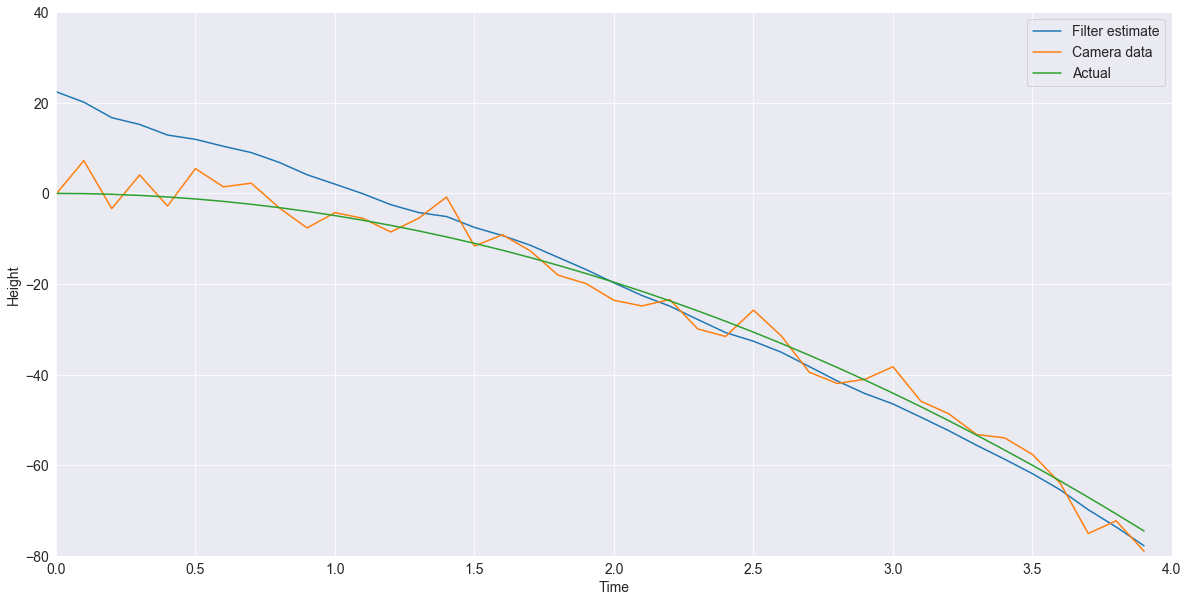

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(times, state_means[:, 0])
ax.plot(times, sim)
ax.plot(times, actual)
ax.set_xlim(0.0, 4.0)
ax.set_ylim(-80, 40)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.legend(['Filter estimate', 'Camera data', 'Actual'], fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Height', fontsize=14)
plt.show()

In [13]:
smoothed_state_means, _ = kf.smooth(sim)

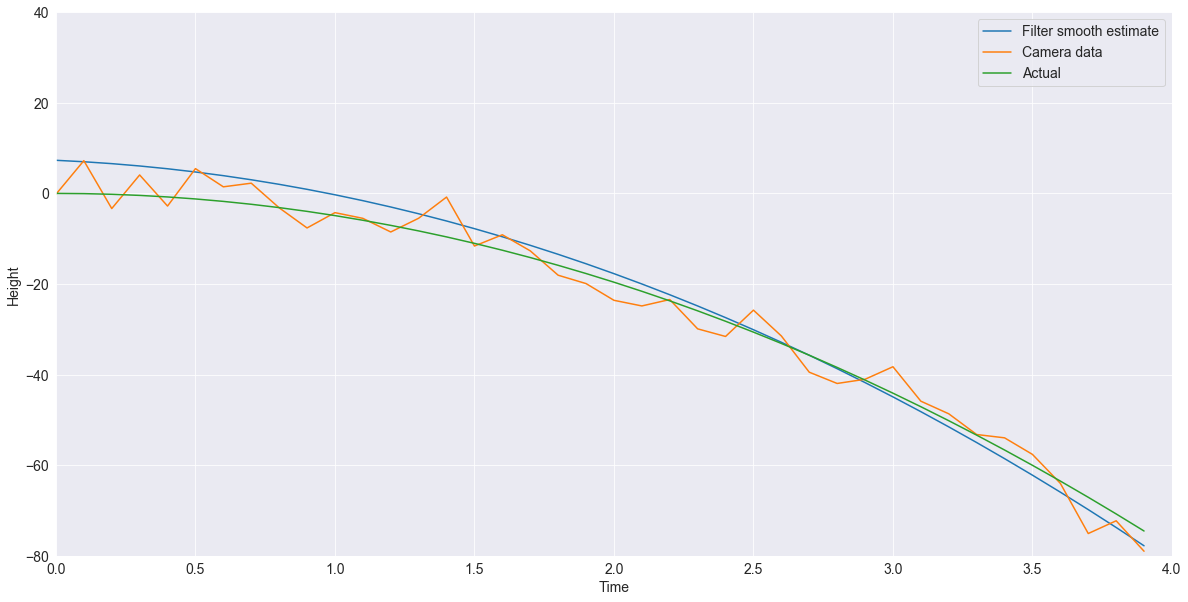

In [14]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(times, smoothed_state_means[:, 0])
ax.plot(times, sim)
ax.plot(times, actual)
ax.set_xlim(0.0, 4.0)
ax.set_ylim(-80, 40)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.legend(['Filter smooth estimate', 'Camera data', 'Actual'], fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Height', fontsize=14)
plt.show()

In [15]:
filtered_state_means = kf.initial_state_mean
filtered_state_covariances = kf.initial_state_covariance

In [16]:
filtered_state_means

[30, 10]

In [17]:
filtered_state_covariances

array([[1., 0.],
       [0., 1.]])

In [18]:
observations = sim[1:]

In [19]:
observations

array([  7.2243067 ,  -3.34278456,   4.07084868,  -2.79069363,
         5.47260846,   1.4524298 ,   2.25511389,  -3.17813334,
        -7.62612428,  -4.24648561,  -5.5058406 ,  -8.51606076,
        -5.48423649,  -0.80988422, -11.61939599,  -9.1321889 ,
       -12.68166138, -18.06250312, -19.90694416, -23.59944029,
       -24.84350272, -23.43161192, -29.90099059, -31.58155189,
       -25.77109752, -31.4720544 , -39.46888679, -41.95662231,
       -41.03267932, -38.26584884, -45.86827212, -48.6510443 ,
       -53.22592248, -53.9590675 , -57.61656087, -64.00892141,
       -75.08336355, -72.27167849, -78.99242341])

In [20]:
results = [filtered_state_means[0]]
for observation in observations:
    filtered_state_means, filtered_state_covariances = kf.filter_update(
        filtered_state_means,
        filtered_state_covariances,
        observation=observation
    )
    results.append(filtered_state_means[0])

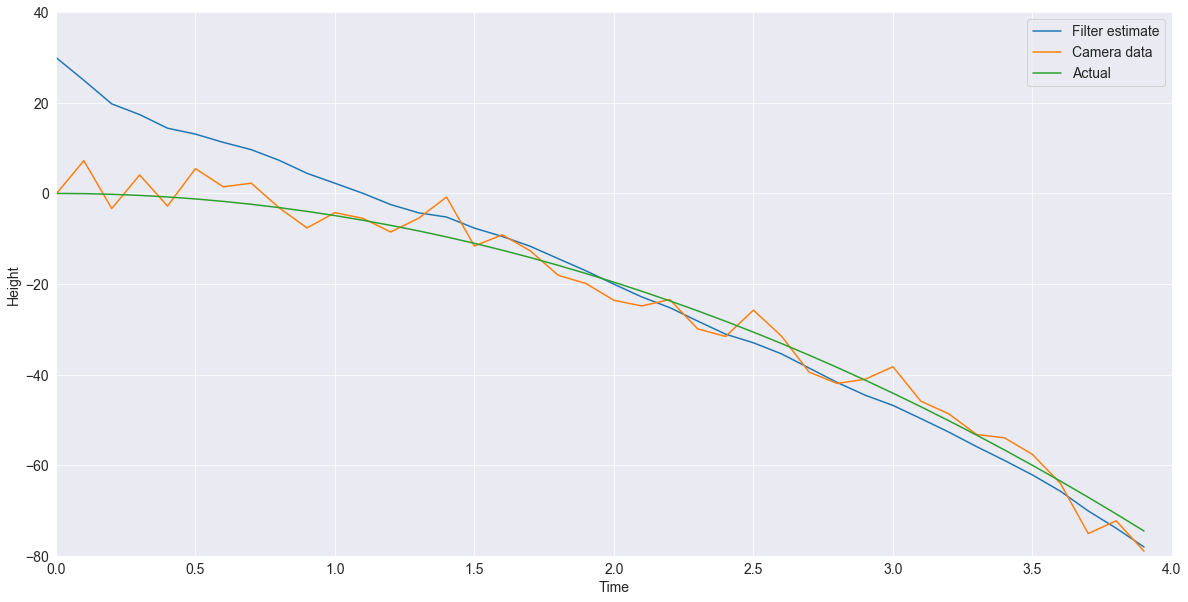

In [21]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(times, results)
ax.plot(times, sim)
ax.plot(times, actual)
ax.set_xlim(0.0, 4.0)
ax.set_ylim(-80, 40)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.legend(['Filter estimate', 'Camera data', 'Actual'], fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Height', fontsize=14)
plt.show()

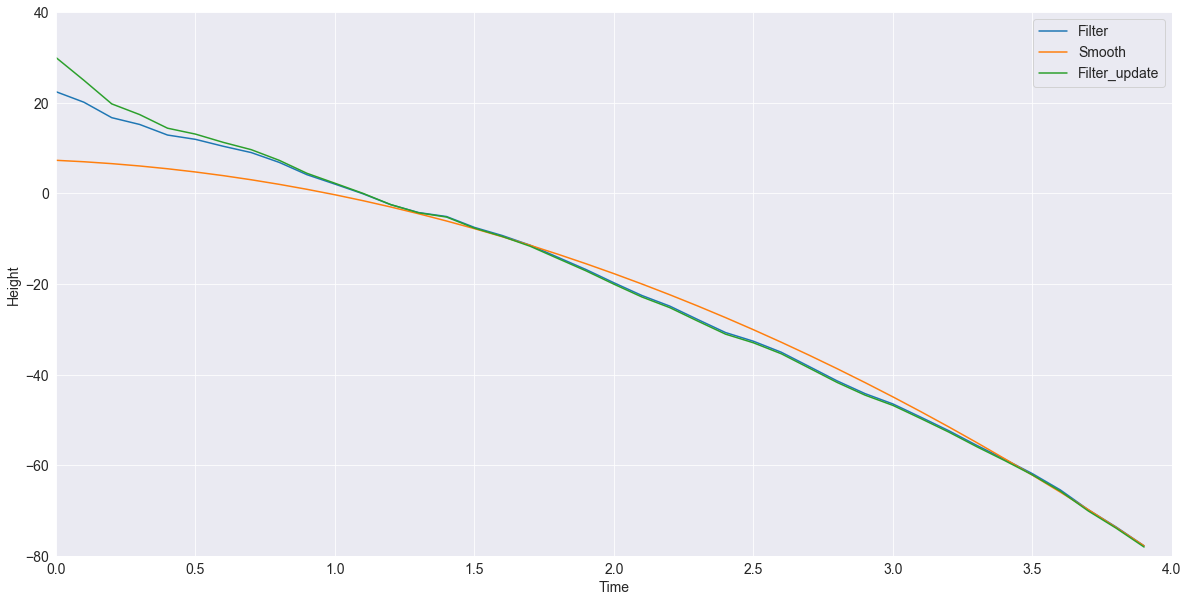

In [22]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(times, state_means[:, 0])
ax.plot(times, smoothed_state_means[:, 0])
ax.plot(times, results)
ax.set_xlim(0.0, 4.0)
ax.set_ylim(-80, 40)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.legend(['Filter', 'Smooth', 'Filter_update'], fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Height', fontsize=14)
plt.show()

In [23]:
state_means[:, 0]

array([ 2.24532863e+01,  2.01338649e+01,  1.67160144e+01,  1.52201369e+01,
        1.28820416e+01,  1.19329721e+01,  1.03999747e+01,  9.01152028e+00,
        6.85179153e+00,  4.12011013e+00,  2.04802080e+00, -7.40415595e-02,
       -2.48627135e+00, -4.23137826e+00, -5.10753209e+00, -7.50494489e+00,
       -9.30372740e+00, -1.14385872e+01, -1.41282158e+01, -1.68089194e+01,
       -1.97298473e+01, -2.25309433e+01, -2.48772717e+01, -2.78293709e+01,
       -3.07164188e+01, -3.26344368e+01, -3.50671729e+01, -3.82214859e+01,
       -4.13904666e+01, -4.41957776e+01, -4.64804856e+01, -4.93967174e+01,
       -5.23805077e+01, -5.56060317e+01, -5.86708268e+01, -6.18739989e+01,
       -6.54599811e+01, -6.98226842e+01, -7.36344245e+01, -7.77907023e+01])

In [24]:
results

[30,
 24.974950067385997,
 19.75827987081402,
 17.400526605943277,
 14.392461335725903,
 13.089192647004763,
 11.260916795550015,
 9.654226581383586,
 7.308938582328367,
 4.428060594806173,
 2.2407250149611837,
 0.02211488436580733,
 -2.472013783044092,
 -4.286745803615043,
 -5.220574240164918,
 -7.667886344545936,
 -9.506595786713042,
 -11.674993218952144,
 -14.394876152849493,
 -17.10037491314336,
 -20.04314146273753,
 -22.860566623775664,
 -25.214489488654593,
 -28.176898243425306,
 -31.070181950760894,
 -32.97982370294674,
 -35.40798859016787,
 -38.56459732524973,
 -41.73377371485564,
 -44.532376702001436,
 -46.80168798839665,
 -49.70980614095495,
 -52.68495289597444,
 -55.90378587297803,
 -58.958314625859295,
 -62.151968218593346,
 -65.73252980037434,
 -70.09909747481046,
 -73.90544241053385,
 -78.0597303518381]